In [13]:
# Instalación de librerias 

#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [14]:
# Bloque para configurar parametros globales 
# --------------------------------------------
# Simulación de serie de tiempo en 2 bandas ( g y r) 

#intervalo de datos 0 - n
interval = 150
cantDatos = 100

# r band
# eje x - tiempo
time = interval*np.sort(np.random.rand(cantDatos))+3
# eje y - flujo de magnitud 
mag = np.random.randn(cantDatos)


#Numero de bin 
n_bin = 10
#Periodo (T)
period = 1
#Cantidad de divisiones del periodo T, T/2, T/4, T/8, T/16
epochPerid = 3
print("Datos")
print("-" * 32)
#print(time)
print("Tiempo min: ",time.min(),"\nTiempo max: ",time.max())
print("cantidad de bins: ",n_bin,"\n ")

#Normalizar el tiempo para dejar todos los valores entre 0 y 1
time =  (time - time.min())/(time.max()-time.min())
#print(time)




Datos
----------------------------------
Tiempo min:  4.595046307954578 
Tiempo max:  152.71446940788206
cantidad de bins:  10 
 


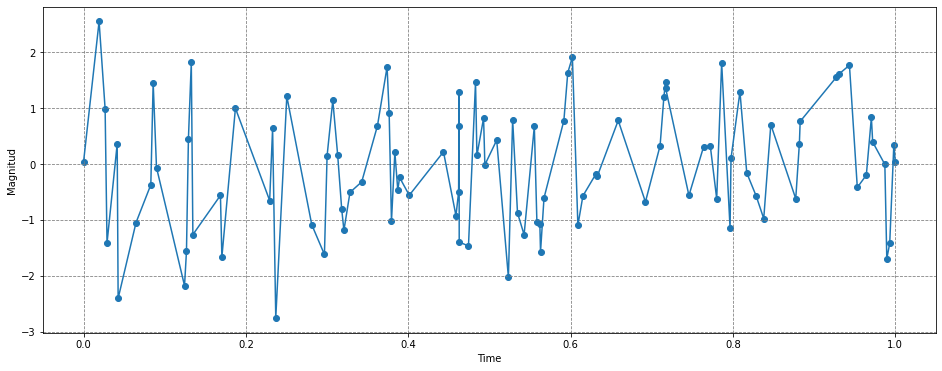

In [15]:
#Grafico para ver la serie de tiempo 

#print(time)
#print(mag)

plt.figure(figsize=(16,6))
plt.plot(time,mag)
plt.scatter(time,mag)
plt.ylabel("Magnitud")
plt.xlabel("Time")
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.show()

In [16]:
#Creacion de un array que contiene los T/n periodos distintos
def arrayPeriod(exp):
    a_period = [1]
    for i in range(1,exp+1):
        a_period.append(2**i)
    return a_period

#Creacion del grafico aplicando el metodo de folding
def drawGraphic(time,mag,indice,variation):
    titulo = "Folded Time Serie with Period T/" + str(variation)
    #Grafico para ver la serie de tiempo 
    plt.figure(figsize=(16,6))
    plt.plot(time[indice],mag[indice])
    plt.scatter(time[indice],mag[indice])
    plt.ylabel("Magnitud")
    plt.xlabel("Time")
    plt.suptitle(titulo,fontsize=22)
    plt.grid(axis='x', color='red', linestyle='-', linewidth=2)
    plt.grid(axis='y', color='gray', linestyle='dashed')
    plt.show()


def getStatistic(idx,indBin,mag):
    magOrdered = mag[idx]
    #print("magOrdered: ", magOrdered)

    vectorMean = np.array([np.nanmean(magOrdered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000  for i in range(n_bin)])
    vectorMax = np.array([np.nanmax(magOrdered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(n_bin)])
    vectorMin = np.array([np.nanmin(magOrdered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(n_bin)])
    vectorStd = np.array([np.nanstd(magOrdered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(n_bin)])

    print("mean:",vectorMean)
    print("max:",vectorMax)
    print("min:",vectorMin)
    print("std:",vectorStd)
    return [vectorMean,vectorMax,vectorMin,vectorStd]

#procesamiento disminuyendo proporcionalmente el periodo
def variationPeriod(v_period,time,mag):
    

    for variation in v_period:
        print("Periodo T/",variation)
        #print(period,variation)
        newPeriod = period / variation
        #print(period,variation,newPeriod)
        #Proceso de folding
        foldedTime = time % newPeriod
        #indices correspondientes del foldedTime
        idx = np.argsort(foldedTime)
        
        #Divido el periodo en bins o intervalos [0,n] para luego obtener datos estadisticos de cada bin
        bins = np.linspace(0,newPeriod,n_bin+1)

        #Concentración de datos en cada bin
        numData = np.histogram(foldedTime[idx],bins=bins)

        #indices - corresponden a los datos del foldedTime que se encuentran en cada bin
        indBin = np.digitize(foldedTime[idx],bins=bins)
        
        print("bins: ",bins)
        print("concentracion de datos en cada bin: ",numData[0])
        print("indice de cada bin: ",indBin)
        #print(mag[idx])
        #print("foldedTime:",foldedTime[idx])
        drawGraphic(foldedTime,mag,idx,variation)
        #primer piso de la matriz que contendrá las caracteristicas en distintos periodos
        vectorStatisticPeriod = np.asmatrix(getStatistic(idx,indBin,mag))
        #print(vectorStatisticPeriod)

        print("_____________________________________________________________________________")
        




Periodo T/ 1
bins:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
concentracion de datos en cada bin:  [11  8  6 14 12 12  7 11  8 11]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5
  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 10 10 10 10]


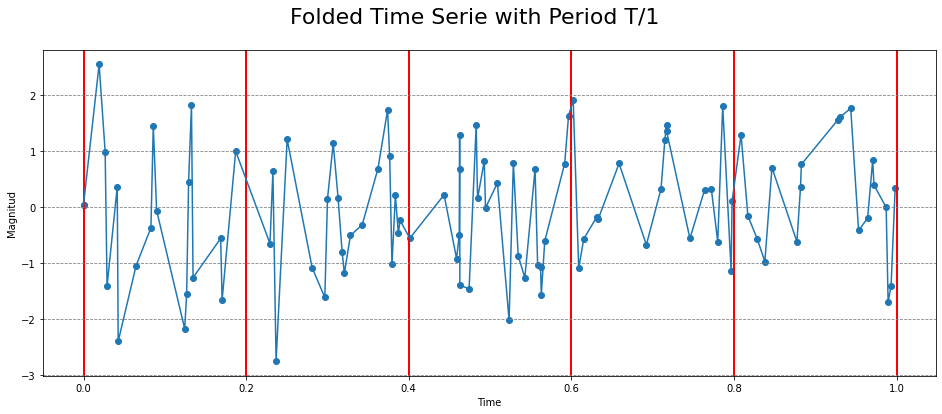

mean: [ 0.01108989 -0.49516882 -0.71100681  0.03061817 -0.02087678 -0.34597922
 -0.00928647  0.41292015  0.09918794  0.24973354]
max: [2.54681245 1.81771772 1.20843135 1.73407346 1.46087445 1.63035997
 1.90786298 1.80675154 1.29145244 1.76428263]
min: [-2.40254727 -2.17547994 -2.75232844 -1.18563667 -1.4657316  -2.02492906
 -1.09645868 -1.1477641  -0.97568774 -1.69239229]
std: [1.30396001 1.34110507 1.33074211 0.82036974 0.93497286 1.10337899
 0.94959328 0.91162742 0.74802988 1.106224  ]
_____________________________________________________________________________
Periodo T/ 2
bins:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
concentracion de datos en cada bin:  [12 11 10  5  8  9 12 10  5 18]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  3
  3  3  3  3  3  3  3  3  3  4  4  4  4  4  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  8  9  9  9  9  9 10 10 10 10 

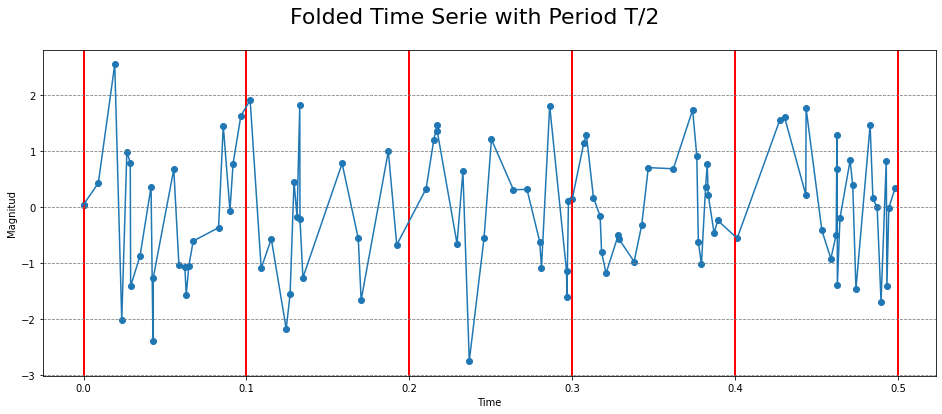

mean: [-0.23269468 -0.11249324 -0.28963717 -0.22599682  0.12635438 -0.08163936
 -0.09012011  0.23035992  0.91510473 -0.11549867]
max: [2.54681245 1.63035997 1.90786298 0.99590785 1.4616472  1.80675154
 1.29145244 1.73407346 1.76428263 1.46087445]
min: [-2.40254727 -1.57104478 -2.17547994 -1.6644019  -2.75232844 -1.61757729
 -1.18563667 -1.02695159 -0.55941741 -1.69239229]
std: [1.35351404 1.04348962 1.29167954 0.98834255 1.32859211 1.0732459
 0.77040184 0.78993461 0.92298529 0.94150269]
_____________________________________________________________________________
Periodo T/ 4
bins:  [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25 ]
concentracion de datos en cada bin:  [ 8 13 13 10  6 14  4  6 14 12]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  8  8  8  8
  8  8  9  9  9  9  9  9  9  9  9

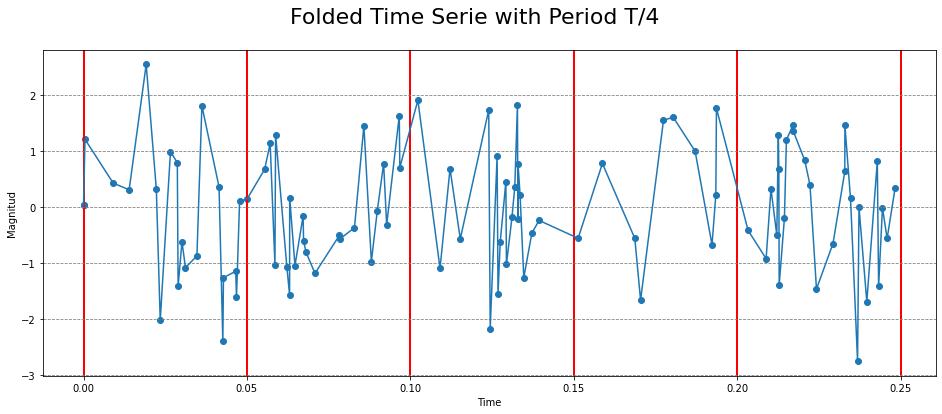

mean: [ 0.35713303 -0.49108882 -0.31359958  0.17579276  0.08051149 -0.07684582
 -0.502036    0.90894726  0.18757473 -0.30784894]
max: [2.54681245 1.80675154 1.29145244 1.63035997 1.90786298 1.81771772
 0.77701656 1.76428263 1.4616472  1.46087445]
min: [-2.02492906 -2.40254727 -1.57104478 -0.97568774 -2.17547994 -1.56171125
 -1.6644019  -0.67716537 -1.4657316  -2.75232844]
std: [1.19402005 1.16022049 0.8953455  0.8560133  1.49077936 0.87984479
 0.86514156 0.87815331 0.97843805 1.13329109]
_____________________________________________________________________________
Periodo T/ 8
bins:  [0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125
 0.125 ]
concentracion de datos en cada bin:  [17  5  9  8  9 10  8 16  9  9]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  8  8  8  

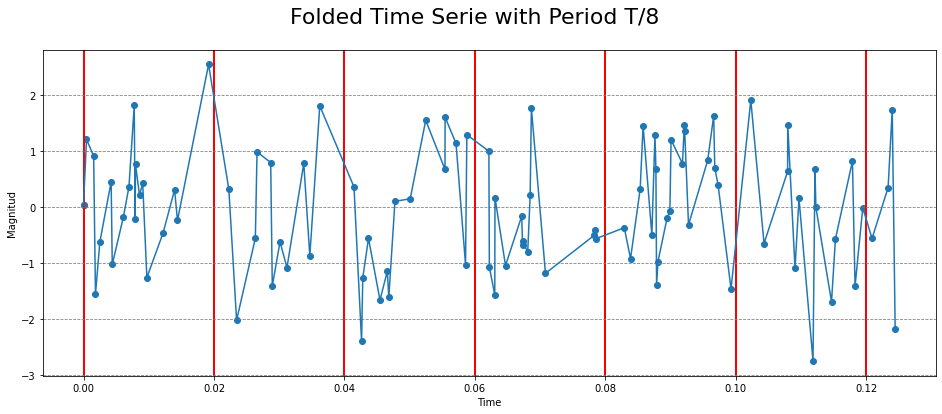

mean: [ 0.05164654  0.18064633 -0.02149225 -1.02485855  0.58742614 -0.39099463
 -0.18920365  0.36860019  0.03635886 -0.39314979]
max: [1.81771772 2.54681245 1.80675154 0.358589   1.60399053 1.76428263
 1.45188733 1.63035997 1.90786298 1.73407346]
min: [-1.56171125 -2.02492906 -1.41387778 -2.40254727 -1.0749243  -1.57104478
 -0.92349644 -1.4657316  -2.75232844 -2.17547994]
std: [0.85621488 1.46116362 1.05955994 0.87505962 0.9724158  0.90217249
 0.70039811 0.97298738 1.32741307 1.1861066 ]
_____________________________________________________________________________


In [17]:
v_period = arrayPeriod(epochPerid)
#[1,2,4,8,16]

#Ver los distintos graficos variando el folded en T/n periodos
variationPeriod(v_period,time,mag)

